# Mithul-bl.en.u4aie21034

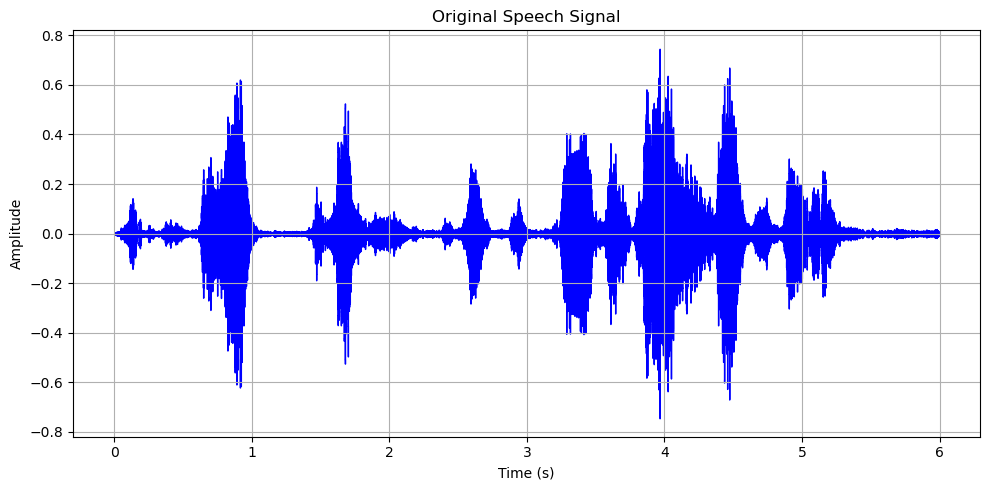

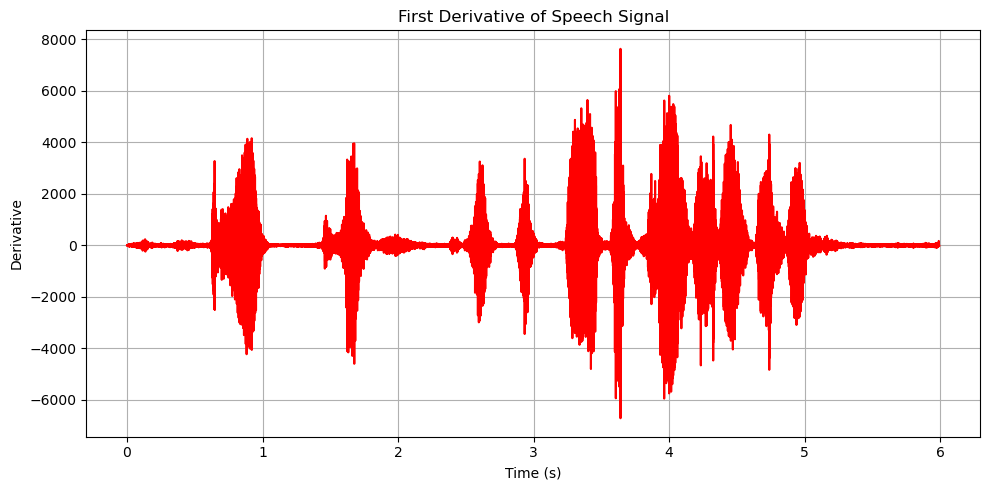

In [48]:

#A1
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

y, sr = librosa.load('Recording.wav')

time_step = 1.0 / sr

derivative_1 = np.diff(y) / time_step

plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(derivative_1)) * time_step, derivative_1, color='red')
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Derivative')
plt.grid(True)
plt.tight_layout()
plt.show()

ipd.Audio(derivative_1, rate=sr)


C:\Users\mithu\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mithu\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\mithu\AppData\Local\Temp\ipykernel_19872\1097416431.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions', color='green')
C:\Users\mithu\AppData\Local\Temp\ipykernel_19872\1097416431.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label=

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 4.37363510025809


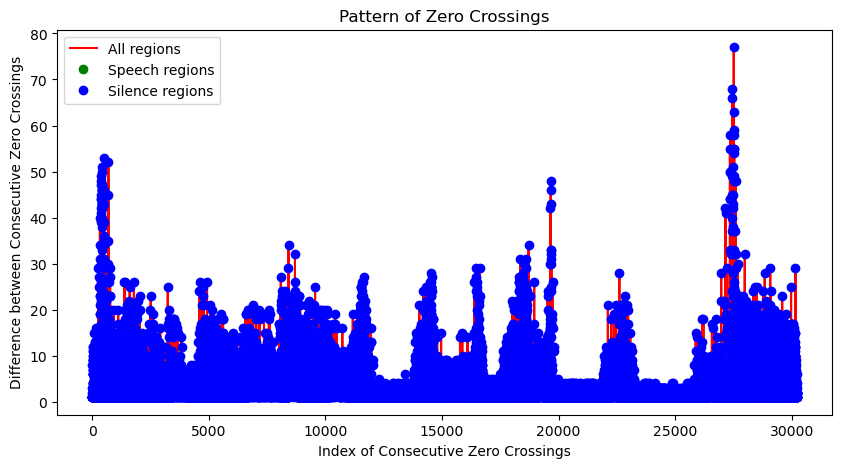

Pattern of Zero Crossings:
All regions: [1 1 1 ... 1 2 1]
Speech regions: []
Silence regions: [1 1 1 ... 1 2 1]


In [49]:
#A2
import numpy as np
import matplotlib.pyplot as plt

zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]

diff = np.diff(zero_crossing)

threshold = 1000

speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions', color='red')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions', color='green')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions', color='blue')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Index of Consecutive Zero Crossings')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)


Length of 'Project' (My): 1.7763265306122449 seconds
Length of 'Project' (project team-mate): 2.246530612244898 seconds
Length of '100' (My): 1.5412244897959184 seconds
Length of '100' (project team-mate): 2.0375510204081633 seconds
Length of 'anime' (My): 1.2537414965986395 seconds
Length of 'anime' (project team-mate): 1.3843537414965987 seconds
Length of 'Titan' (My): 1.2016326530612245 seconds
Length of 'Titan' (project team-mate): 1.5933333333333333 seconds
Length of 'Apple' (My): 1.3061224489795917 seconds
Length of 'Apple' (project team-mate): 1.2015419501133786 seconds


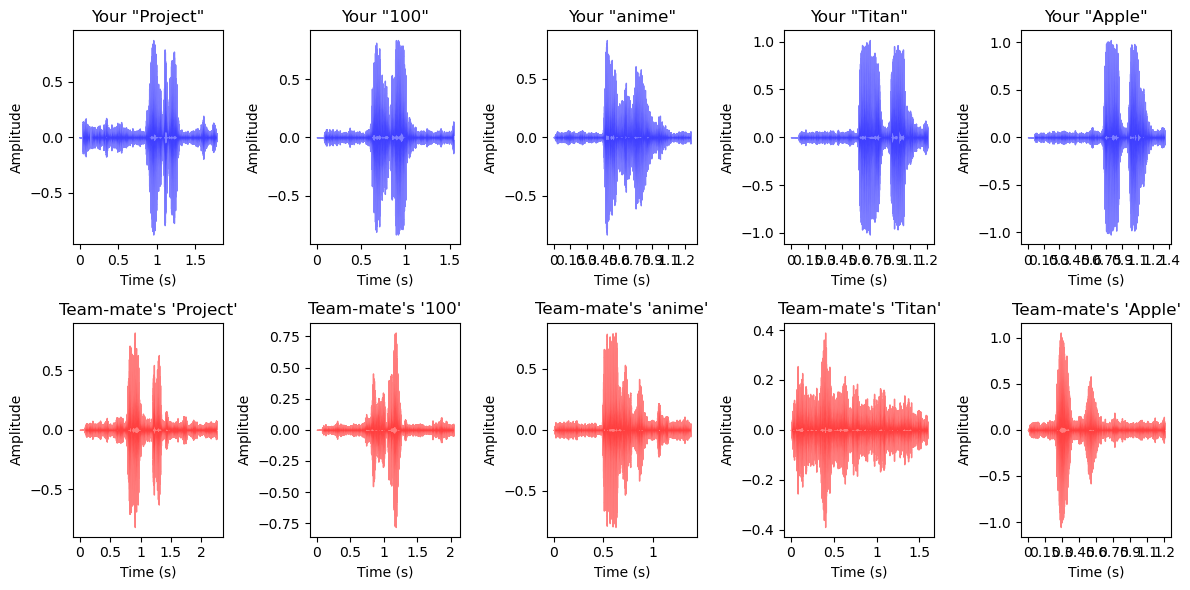

In [50]:
#A3
import librosa
import matplotlib.pyplot as plt

word_files_mine = ['Project_1.mp3', '100_1.mp3', 'anime_1.mp3', 'Titan_1.mp3', 'Apple_1.mp3']
word_files_team_mate = ['Project_2.mp3', '100_2.mp3', 'anime_2.mp3', 'Titan_2.mp3', 'Apple_2.mp3']

words = ['Project', '100', 'anime', 'Titan', 'Apple']

word_lengths_mine = []
for file in word_files_mine:
    audio, sr = librosa.load('Downloads/' + file)
    word_lengths_mine.append(librosa.get_duration(y=audio, sr=sr))

word_lengths_team_mate = []
for file in word_files_team_mate:
    audio, sr = librosa.load('Downloads/' + file)
    word_lengths_team_mate.append(librosa.get_duration(y=audio, sr=sr))

for i, word in enumerate(words):
    print(f"Length of '{word}' (My): {word_lengths_mine[i]} seconds")
    print(f"Length of '{word}' (project team-mate): {word_lengths_team_mate[i]} seconds")

plt.figure(figsize=(12, 6))
for i, (word, file) in enumerate(zip(words, word_files_mine)):
    audio, sr = librosa.load('Downloads/' + file)
    plt.subplot(2, len(words), i + 1)
    librosa.display.waveshow(audio, sr=sr, color='blue', alpha=0.5)  # Blue for your signals
    plt.title(f'Your "{word}"')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

for i, (word, file) in enumerate(zip(words, word_files_team_mate)):
    audio, sr = librosa.load('Downloads/' + file)
    plt.subplot(2, len(words), len(words) + i + 1)
    librosa.display.waveshow(audio, sr=sr, color='red', alpha=0.5)  # Red for team-mate's signals
    plt.title(f"Team-mate's '{word}'")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


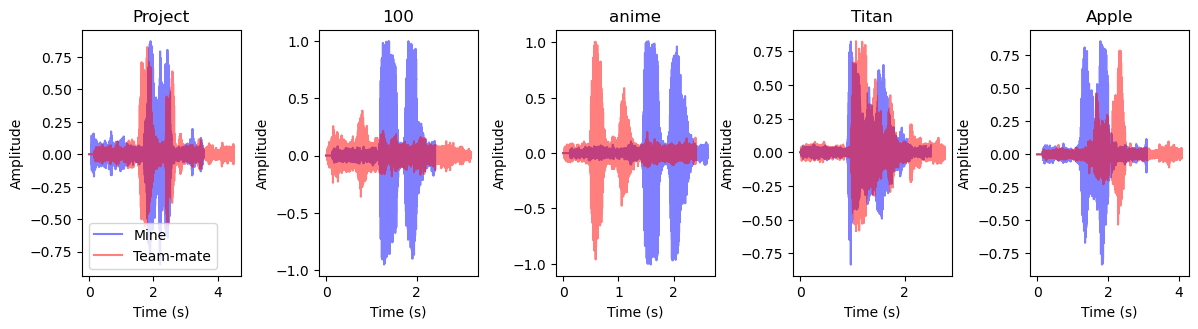

In [51]:
plt.figure(figsize=(12, 6))
for i, (word, signal_mine, signal_team_mate) in enumerate(zip(words, word_signals_mine, word_signals_team_mate)):
    plt.subplot(2, len(words), i + 1)
    duration_mine = len(signal_mine) / sr
    duration_team_mate = len(signal_team_mate) / sr
    time_mine = np.linspace(0, duration_mine, len(signal_mine))
    time_team_mate = np.linspace(0, duration_team_mate, len(signal_team_mate))
    
    plt.plot(time_mine, signal_mine, color='blue', alpha=0.5, label='Mine')  # Blue for your signals
    plt.plot(time_team_mate, signal_team_mate, color='red', alpha=0.5, label='Team-mate')  # Red for team-mate's signals
    plt.title(f'{word}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()


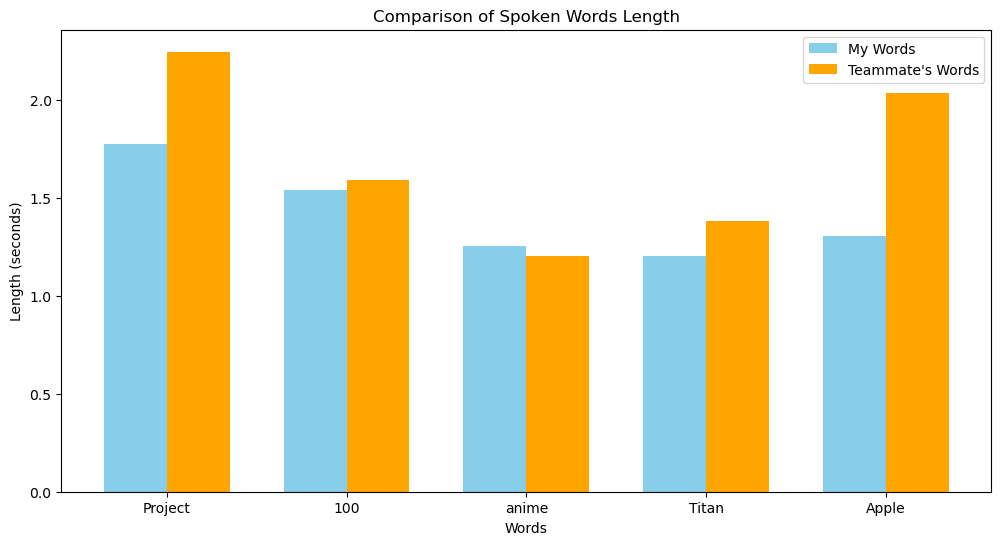

In [52]:

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_mine, bar_width, label='My Words', color='skyblue')
plt.bar(index + bar_width/2, word_lengths_teammate, bar_width, label="Teammate's Words", color='orange')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()


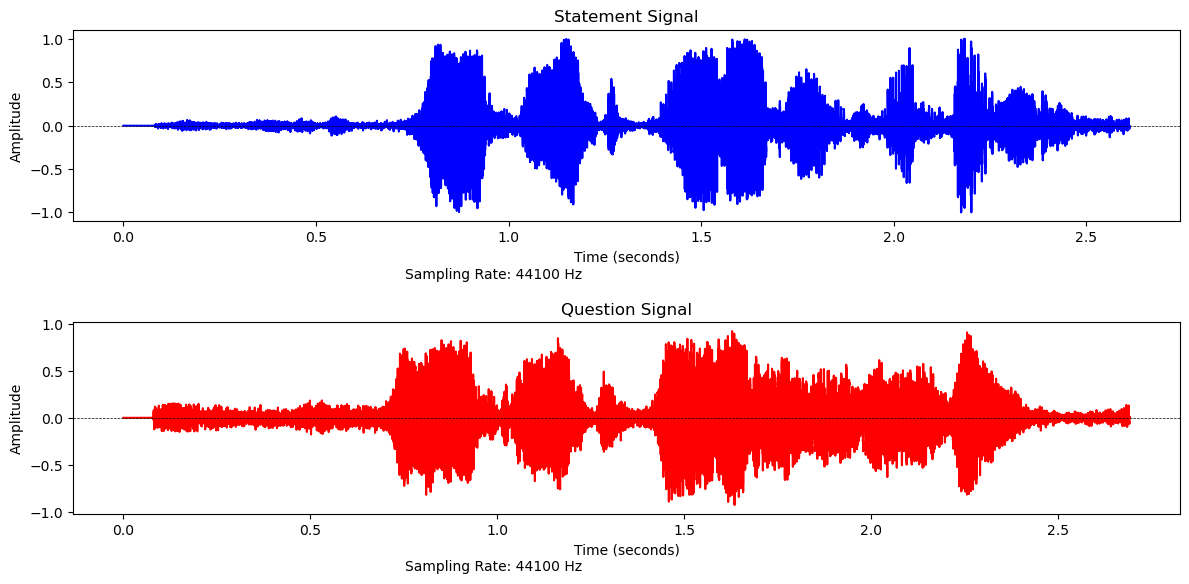

In [53]:
#A4
import librosa
import numpy as np
import matplotlib.pyplot as plt

statement, sr1 = librosa.load('Statement.mp3', sr=None)
question, sr2 = librosa.load('Question.mp3', sr=None)

duration_statement = len(statement) / sr1
duration_question = len(question) / sr2

time_statement = np.linspace(0, duration_statement, len(statement))
time_question = np.linspace(0, duration_question, len(question))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_statement, statement, color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
plt.title('Statement Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.text(0.3, -0.3, f'Sampling Rate: {sr1} Hz', fontsize=10, transform=plt.gca().transAxes)

plt.subplot(2, 1, 2)
plt.plot(time_question, question, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
plt.title('Question Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.text(0.3, -0.3, f'Sampling Rate: {sr2} Hz', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


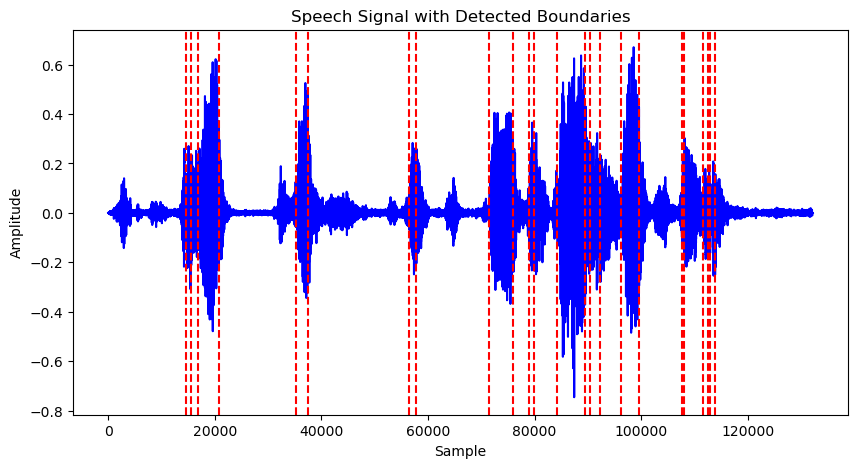

Detected Word Boundaries (in seconds): [0.66 0.7  0.76 0.94 1.6  1.7  2.56 2.62 3.24 3.44 3.58 3.62 3.82 4.06
 4.1  4.18 4.36 4.52 4.88 4.9  5.06 5.1  5.12 5.16]


In [56]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

signal, sr = librosa.load('Recording.wav')

frame_length = int(0.02 * sr)  
energy = np.array([sum(abs(signal[i:i+frame_length]**2)) for i in range(0, len(signal), frame_length)])

energy_threshold = np.mean(energy) * 1.5  
speech_segments = (energy > energy_threshold).astype(int)

boundaries = np.where(np.diff(speech_segments) != 0)[0] * frame_length

plt.figure(figsize=(10, 5))
plt.plot(signal, color='b')
for boundary in boundaries:
    plt.axvline(x=boundary, color='r', linestyle='--')
plt.title('Speech Signal with Detected Boundaries')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

boundaries_seconds = boundaries / sr
print("Detected Word Boundaries (in seconds):", boundaries_seconds)
